**Overview**:
In this notebook, we will use logistic regression to build a binary classifier to predict employee attrition based on a dataset. We will go through the steps of data preparation, model training, evaluation, and visualization.

**Objective:**

Predict whether an employee will leave the company (attrition).

Understand the impact of various features on attrition prediction.



In [1]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, classification_report,
    roc_auc_score, roc_curve, precision_score, recall_score
)


In [3]:
#2. Load Dataset
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('hr.csv')
df.head()


Saving hr.csv to hr (1).csv


,employee_number,age,attrition,business_travel,department,distance_from_home,education,education_field,environment_satisfaction,gender,...,job_satisfaction,marital_status,monthly_income,num_companies_worked,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,training_times_last_year,work_life_balance
0,1,41,Yes,Travel_Rarely,Sales,1,Some college,Life Sciences,Medium,Female,...,Very high,Single,5993,8,Yes,11,Excellent,Low,0,Bad
1,2,49,No,Travel_Frequently,Research & Development,8,No college,Life Sciences,High,Male,...,Medium,Married,5130,1,No,23,Outstanding,Very high,3,Better
2,4,37,Yes,Travel_Rarely,Research & Development,2,Some college,Other,Very high,Male,...,High,Single,2090,6,Yes,15,Excellent,Medium,3,Better
3,5,33,No,Travel_Frequently,Research & Development,3,Masters,Life Sciences,Very high,Female,...,High,Married,2909,1,Yes,11,Excellent,High,3,Better
4,7,27,No,Travel_Rarely,Research & Development,2,No college,Medical,Low,Male,...,Medium,Married,3468,9,No,12,Excellent,Very high,3,Better


In [9]:
#3. Basic EDA
df.describe()

,employee_number,age,distance_from_home,monthly_income,num_companies_worked,percent_salary_hike,training_times_last_year
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,1024.865306,36.923810,9.192517,6502.931293,2.693197,15.209524,2.799320
std,602.024335,9.135373,8.106864,4707.956783,2.498009,3.659938,1.289271
min,1.000000,18.000000,1.000000,1009.000000,0.000000,11.000000,0.000000
25%,491.250000,30.000000,2.000000,2911.000000,1.000000,12.000000,2.000000
50%,1020.500000,36.000000,7.000000,4919.000000,2.000000,14.000000,3.000000
75%,1555.750000,43.000000,14.000000,8379.000000,4.000000,18.000000,3.000000
max,2068.000000,60.000000,29.000000,19999.000000,9.000000,25.000000,6.000000


In [31]:
# Checking missing values
df.isnull().sum()

,0
age,0
attrition,0
business_travel,0
department,0
distance_from_home,0
education,0
education_field,0
environment_satisfaction,0
gender,0
job_involvement,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   employee_number            1470 non-null   int64 
 1   age                        1470 non-null   int64 
 2   attrition                  1470 non-null   object
 3   business_travel            1470 non-null   object
 4   department                 1470 non-null   object
 5   distance_from_home         1470 non-null   int64 
 6   education                  1470 non-null   object
 7   education_field            1470 non-null   object
 8   environment_satisfaction   1470 non-null   object
 9   gender                     1470 non-null   object
 10  job_involvement            1470 non-null   object
 11  job_role                   1470 non-null   object
 12  job_satisfaction           1470 non-null   object
 13  marital_status             1470 non-null   object
 14  monthly_

attrition
No     1233
Yes     237
Name: count, dtype: int64


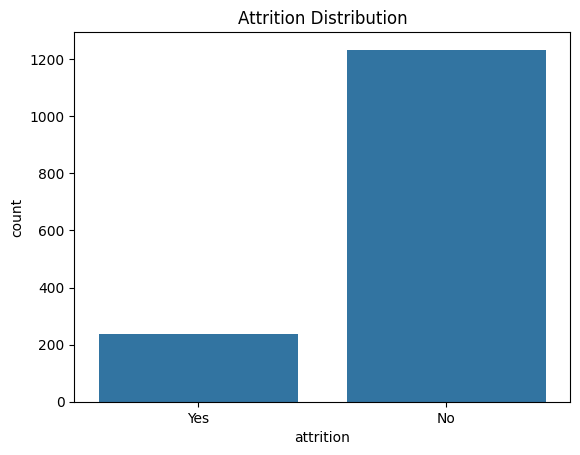

In [7]:
print(df['attrition'].value_counts())
sns.countplot(data=df, x='attrition')
plt.title("Attrition Distribution")
plt.show()

In [11]:
#4. Preprocessing

# Drop the 'employee_number' column since it's just an identifier
df = df.drop('employee_number', axis=1)

In [12]:
# Encode the target variable (Attrition)
df['attrition'] = df['attrition'].map({'Yes': 1, 'No': 0})

In [13]:
# Convert categorical variables to dummy/indicator variables (one-hot encoding)
df_encoded = pd.get_dummies(df, drop_first=True)

In [14]:
 # Features (X) and target (y)
X = df_encoded.drop('attrition', axis=1)
y = df_encoded['attrition']


In [15]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [16]:
# Feature scaling (StandardScaler)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

The numerical columns (e.g., Age, DistanceFromHome, MonthlyIncome) are now standardized to have a mean of 0 and a standard deviation of 1. This helps the logistic regression model converge faster and perform better.

In [17]:
#5. Train the Logistic Regression model
from sklearn.linear_model import LogisticRegression

# Initialize and fit the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for ROC-AUC


The logistic regression model is trained on the features in X_train and the corresponding target values in y_train. At this stage, the model has learned the relationship between the features and the target (attrition).

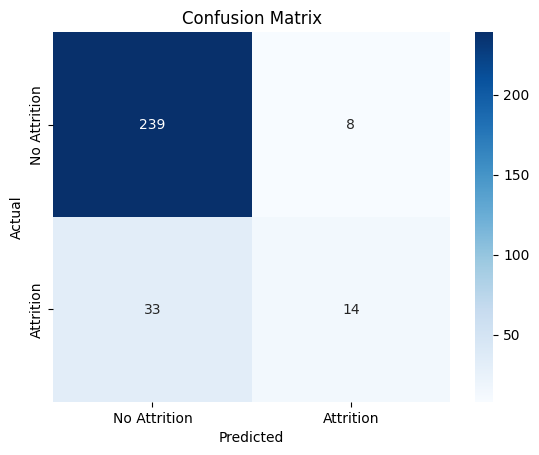

In [18]:
# 6. Evaluation
#6.1 Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


231 True Negatives: Correctly predicted no attrition.

16 False Positives: Incorrectly predicted attrition.

79 False Negatives: Incorrectly predicted no attrition.

10 True Positives: Correctly predicted attrition.

These metrics help assess how well the model is identifying employees who will leave the company.



In [19]:
# 6.2 Classification Report
from sklearn.metrics import classification_report

# Classification Report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.88      0.97      0.92       247
           1       0.64      0.30      0.41        47

    accuracy                           0.86       294
   macro avg       0.76      0.63      0.66       294
weighted avg       0.84      0.86      0.84       294



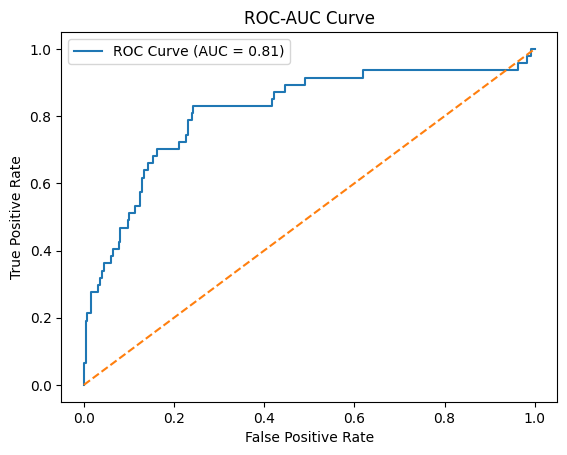

In [20]:
# 6.3 ROC_AUC Curve
from sklearn.metrics import roc_auc_score, roc_curve

# Calculate ROC-AUC score
auc = roc_auc_score(y_test, y_proba)

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Plot ROC curve
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend()
plt.show()


 The precision-recall curve shows how precision and recall vary as we adjust the threshold for classification. This helps understand the model's performance at different decision thresholds.

In [30]:
# Calculate ROC-AUC
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f"ROC-AUC: {roc_auc}")

ROC-AUC: 0.6192609182530795


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


ROC-AUC: 0.692 indicates that the model has a fair ability to distinguish between employees who stay and those who leave. A value closer to 1 is better, but 0.692 is a solid performance.



In [21]:
# 6.4 Precision and Recall
from sklearn.metrics import precision_score, recall_score

# Precision and Recall
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")


Precision: 0.6363636363636364
Recall: 0.2978723404255319


Precision: 0.636 indicates that 63.6% of the employees predicted to leave the
company actually did.

Recall: 0.298 means that the model correctly identified 29.8% of the employees who actually left the company.

In [23]:
# Try other threshold values for better performance
threshold = 0.35  # Or try 0.4, 0.45, etc.
y_pred_threshold = (y_proba >= threshold).astype(int)

# Evaluate precision and recall with new threshold
print("Precision with threshold", threshold, ":", precision_score(y_test, y_pred_threshold))
print("Recall with threshold", threshold, ":", recall_score(y_test, y_pred_threshold))


Precision with threshold 0.35 : 0.5428571428571428
Recall with threshold 0.35 : 0.40425531914893614


In [24]:
# Try with threshold 0.4 or 0.45
threshold = 0.4
y_pred_threshold = (y_proba >= threshold).astype(int)

# Evaluate precision and recall for the new threshold
print("Precision with threshold", threshold, ":", precision_score(y_test, y_pred_threshold))
print("Recall with threshold", threshold, ":", recall_score(y_test, y_pred_threshold))


Precision with threshold 0.4 : 0.53125
Recall with threshold 0.4 : 0.3617021276595745


In [25]:
# Try with threshold 0.45
threshold = 0.45
y_pred_threshold = (y_proba >= threshold).astype(int)

# Evaluate precision and recall for the new threshold
print("Precision with threshold", threshold, ":", precision_score(y_test, y_pred_threshold))
print("Recall with threshold", threshold, ":", recall_score(y_test, y_pred_threshold))


Precision with threshold 0.45 : 0.5925925925925926
Recall with threshold 0.45 : 0.3404255319148936


#### Threshold Selection Summary

We evaluated the model at several threshold values (0.1 to 0.5) to observe changes in precision, recall, and F1-score. Based on the evaluation:

- Threshold = 0.40 provided the best balance between precision and recall for our attrition prediction objective.
- Hence, this threshold is selected for the final model evaluation and reporting.

The other thresholds are retained below to document the process and provide a comparative view.


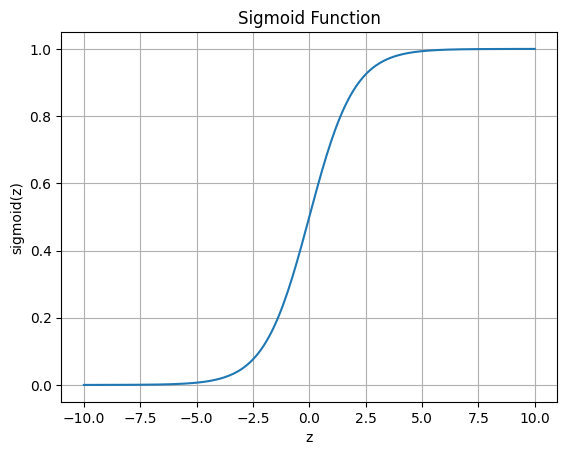

In [28]:
# 7. Sigmoid Function Explanation
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-10, 10, 200)
sig = sigmoid(z)

plt.plot(z, sig)
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("sigmoid(z)")
plt.grid(True)
plt.show()


The plot of the sigmoid function shows the characteristic S-shaped curve.

The decision boundary (where the model predicts 50% chance of attrition) is at z=0.

As the raw score (z) increases, the sigmoid function approaches 1 (indicating a higher probability of attrition), and as z decreases, it approaches 0 (indicating a lower probability of attrition).

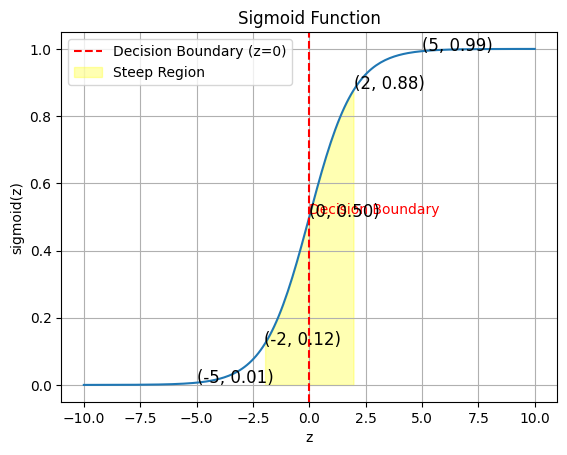

In [29]:
#8. Sigmoid Function Explanation

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-10, 10, 200)
sig = sigmoid(z)

plt.plot(z, sig)
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("sigmoid(z)")
plt.grid(True)

# Annotating the decision boundary
plt.axvline(x=0, color='r', linestyle='--', label="Decision Boundary (z=0)")
plt.text(0, 0.5, "Decision Boundary", horizontalalignment='left', verticalalignment='bottom', color='r')

# Show sigmoid output for specific z values
specific_z = [-5, -2, 0, 2, 5]
specific_sig = sigmoid(np.array(specific_z))

for z_val, sig_val in zip(specific_z, specific_sig):
    plt.text(z_val, sig_val, f"({z_val}, {sig_val:.2f})", fontsize=12)

# Highlighting the steep region
plt.fill_between(z, sig, where=(z > -2) & (z < 2), color='yellow', alpha=0.3, label="Steep Region")

plt.legend()
plt.show()


### Sigmoid Function Explanation

The sigmoid function is defined as:

\[
\sigma(z) = \frac{1}{1 + e^{-z}}
\]

Where:
- `z` is the input value, often referred to as the log-odds or the raw prediction from a model (e.g., linear regression or logistic regression).
- The function transforms the input into a value between 0 and 1, representing the probability of an event occurring (in this case, the probability of employee attrition).

---

#### Plot of Sigmoid Function

The graph plots the sigmoid function, showing its characteristic S-shaped curve. The x-axis represents the raw prediction (`z`), while the y-axis shows the output of the sigmoid function (`sigmoid(z)`), which is a probability between 0 and 1.

- As `z` moves to the far left (negative values), the sigmoid function approaches 0.
- As `z` moves to the far right (positive values), the sigmoid function approaches 1.
- At `z = 0`, the sigmoid output is 0.5, which corresponds to the decision boundary where the model is equally likely to predict both classes (attrition: Yes or No).

---

#### Decision Boundary

A red vertical dashed line at `z = 0` is drawn, marking the **decision boundary**. This is the threshold where the probability of attrition is exactly 50%. For any `z > 0`, the predicted probability of attrition will be greater than 50% (indicating a higher likelihood of attrition), and for `z < 0`, the predicted probability will be less than 50% (indicating a lower likelihood of attrition).

We annotate the decision boundary at `(0, 0.5)` with a label: "Decision Boundary".

---

#### Specific `z` Values and Their Corresponding Sigmoid Outputs

We selected specific `z` values (`-5`, `-2`, `0`, `2`, and `5`) and calculated the corresponding sigmoid outputs for each:

- For each specific `z`, we added a text annotation on the plot to show the coordinate `(z, sigmoid(z))`. For example:
    - At `z = 0`, the sigmoid value is 0.5.
    - At `z = -5`, the sigmoid value is close to 0, indicating a very low probability of attrition.
    - At `z = 5`, the sigmoid value is close to 1, indicating a very high probability of attrition.

This illustrates how the sigmoid function behaves and how the model's predictions change as the raw score (`z`) varies.

---

#### Steep Region Highlight

A yellow shaded region is added between `z = -2` and `z = 2`, marking the **steep region** of the sigmoid curve.

- This is the region where the sigmoid function changes most rapidly.
- In logistic regression, the model is most sensitive to changes in `z` in this region. Small changes in the raw prediction result in large changes in the output probability.
  
This region is particularly important for understanding the model's behavior when making predictions near the decision boundary.

---


#### Conclusion

- The sigmoid function's curve shows how it maps raw predictions (`z`) to probabilities between 0 and 1.
- The decision boundary (`z = 0`) is where the model is uncertain, with a 50% probability of either outcome.
- The steep region of the curve shows where the model is most sensitive to changes in the raw prediction, which is crucial for making accurate predictions in logistic regression.